In [129]:
import torch 
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

from statistics import mean
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [130]:
class data(Dataset):

    def __init__(self, directory, target_col_name):
        self.dataset = pd.read_csv(directory)
        self.cols = self.dataset.columns

        self.x = np.array(self.dataset[self.cols[self.cols != target_col_name]].values, dtype = np.float32)
        self.y = np.array(self.dataset[[target_col_name]].values, dtype = np.float32)

        self.x_normalized = StandardScaler().fit_transform(self.x)

        self.x = torch.from_numpy(self.x_normalized)
        self.y = torch.from_numpy(self.y)

        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [131]:
class lr_model(nn.Module):

    def __init__(self, input_size, output_size):
        super(lr_model, self).__init__()
        self.linear_model = nn.Linear(input_size, output_size)

    def forward(self, x):
        yhat = self.linear_model(x)
        return yhat

In [132]:
learning_rate = 0.00001
dataset = data('concrete_data.csv', 'Strength')
loader = DataLoader(dataset = dataset, batch_size = 5, shuffle = True)

model = lr_model(len(dataset[0][0]), len(dataset[0][1]))
print(list(model.parameters()))

opt = optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

[Parameter containing:
tensor([[ 0.2397,  0.1072, -0.1342, -0.0038, -0.0629, -0.1414, -0.3076, -0.2676]],
       requires_grad=True), Parameter containing:
tensor([-0.1500], requires_grad=True)]


-------------------------
Epoch :  0
Loss :  1563.0806376633134
-------------------------
Epoch :  100
Loss :  746.1172901264672
-------------------------
Epoch :  200
Loss :  391.91722981906634
-------------------------
Epoch :  300
Loss :  237.21892269375255
-------------------------
Epoch :  400
Loss :  169.11890702108735
-------------------------
Epoch :  500
Loss :  138.82607289193902
-------------------------
Epoch :  600
Loss :  125.13109159469604
-------------------------
Epoch :  700
Loss :  118.76943261878004
-------------------------
Epoch :  800
Loss :  115.67650831787331
-------------------------
Epoch :  900
Loss :  114.0602667725202
-------------------------
Epoch :  1000
Loss :  113.12588192421256


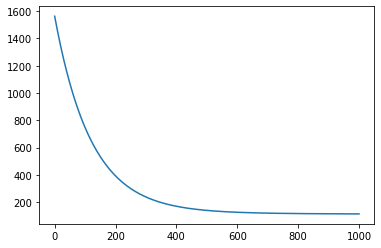

In [133]:
epochs = 1000
mean_loss_list = []

for epoch in range(epochs + 1):
    losses = []
    for x,y in loader :

        opt.zero_grad()
        yhat = model.forward(x)

        loss = criterion(yhat, y)
        losses.append(loss.item())
        loss.backward()

        opt.step()

    mean_loss = mean(losses)
    mean_loss_list.append(mean_loss)

    if epoch % (epochs/10) == 0 :
        print('-' * 25)
        print('Epoch : ', epoch)
        print('Loss : ', mean_loss)

plt.plot(mean_loss_list)
plt.show()